In [2]:
# Q: Have we made this project too much into a DS project?
# Q: Attacking the house recommendation space using different methods in order to investigate which one is the best eg we have decision and random forest to do house rec using same parameters, is this okay? 
# Q: What type of explanations whould we be giving for the models? We would like your advice on this.
# import needed libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [3]:
# load the data
df = pd.read_csv('synthetic_house_recommendation_data.csv')


In [4]:
df.head()


,Unnamed: 0,latitude,longitude,house_type,price,bedrooms,bathrooms,neighbourhood_quality,house_condition,crime_rate,garden_size,house_keywords
0,0,53.108470,-0.411203,Terraced,300890.76,7,4,Pleasant,Abysmal,High,94.20,"['reception', 'forest-view', 'study-room', 're..."
1,1,55.854867,-4.279985,Land,272455.06,4,3,Pleasant,Alright,Medium,260.42,"['garden', 'laundry-room', 'comfortable', 'saf..."
2,2,51.523723,-2.500452,Land,172964.52,1,3,Pleasant,Alright,Medium,78.91,"['sauna', 'secure', 'recessed-lighting', 'buil..."
3,3,51.759018,-0.245954,Terraced,329183.39,3,1,Alright,Pleasant,Medium,31.37,"['crown-molding', 'greenhouse', 'peaceful', 'l..."
4,4,50.731135,-3.504734,Terraced,739525.34,3,2,Pleasant,Alright,Low,6.00,"['convenient', 'condo', 'water-saving', 'perma..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30000 non-null  int64  
 1   latitude               30000 non-null  object 
 2   longitude              30000 non-null  object 
 3   house_type             30000 non-null  object 
 4   price                  30000 non-null  float64
 5   bedrooms               30000 non-null  int64  
 6   bathrooms              30000 non-null  int64  
 7   neighbourhood_quality  30000 non-null  object 
 8   house_condition        30000 non-null  object 
 9   crime_rate             30000 non-null  object 
 10  garden_size            30000 non-null  float64
 11  house_keywords         30000 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 2.7+ MB


In [6]:
df.describe()

,Unnamed: 0,price,bedrooms,bathrooms,garden_size
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,14999.500000,3.621642e+05,3.005933,2.002233,149.833012
std,8660.398374,2.846226e+05,1.407680,1.008495,393.886377
min,0.000000,1.731773e+04,1.000000,1.000000,0.060000
25%,7499.750000,1.763992e+05,2.000000,1.000000,17.967500
50%,14999.500000,2.841899e+05,3.000000,2.000000,49.200000
75%,22499.250000,4.565909e+05,4.000000,3.000000,135.220000
max,29999.000000,5.318473e+06,10.000000,8.000000,17606.120000


In [7]:
# 
print("Unique values in 'house_type':", df['house_type'].unique())
print('\n')
print("Unique values in 'neighbourhood_quality':", df['neighbourhood_quality'].unique())
print('\n')

print("Unique values in 'house_condition':", df['house_condition'].unique())
print('\n')

print("Unique values in 'crime_rate':", df['crime_rate'].unique())
print('\n')

print("Unique values in 'house_keywords':", df['house_keywords'].unique())
print('\n')


Unique values in 'house_type': ['Terraced' 'Land' 'Semi-Detached' 'Bungalow' 'Detached' 'Flat'
 'Park Home']


Unique values in 'neighbourhood_quality': ['Pleasant' 'Alright' 'Abysmal' 'Outstanding' 'Rough']


Unique values in 'house_condition': ['Abysmal' 'Alright' 'Pleasant' 'Outstanding' 'Rough']


Unique values in 'crime_rate': ['High' 'Medium' 'Low' 'Very Low' 'Very High' 'Non Existent' 'Extreme']


Unique values in 'house_keywords': ["['reception', 'forest-view', 'study-room', 'reverse-osmosis', 'solar-heating', 'laundry-room', 'brick-fireplace', 'backup-generator', 'damp-proof', 'safe', 'dog-run', 'carbon-monoxide-detectors', 'historic', 'rain-barrel', 'water-saving', 'earthquake-resistant', 'birdhouse', 'earthquake-resistant', 'catio', 'basement', 'sustainable', 'ecosystem-friendly', 'filtration-system', 'terrace', 'electric-stove', 'welcoming', 'utility-room', 'thermal-insulation', 'estate', 'soundproof', 'rustic', 'wainscoting', 'passive-house', 'vintage-style', 'classic', 'h

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Assuming 'df' is your DataFrame
# Columns to be one-hot encoded
categorical_columns = ['house_type', 'neighbourhood_quality', 'house_condition', 'crime_rate']

# Set up OneHotEncoder and ColumnTransformer
encoder = OneHotEncoder()
transformer = ColumnTransformer([
    ("one_hot", encoder, categorical_columns)
], remainder='passthrough')

# Apply encoder to the data
df_encoded_array = transformer.fit_transform(df)

# Accessing categories from the fitted transformer
# Get the encoder and then the categories
fitted_encoder = transformer.named_transformers_['one_hot']
categories = fitted_encoder.categories_

# Creating a flat list of new column names for the categorical variables
category_mapping = [f"{cat}__{subcat}" for cat, sublist in zip(categorical_columns, categories) for subcat in sublist]

# Get names of columns that were not transformed (passthrough)
passthrough_indices = [i for i, col in enumerate(df.columns) if col not in categorical_columns]
passthrough_columns = [df.columns[i] for i in passthrough_indices]

# Combine all column names
all_columns = category_mapping + passthrough_columns

# Create the DataFrame with the appropriate column names
df_encoded = pd.DataFrame(df_encoded_array, columns=all_columns)  # Ensure to convert sparse matrix to array

# Check the first few rows of the encoded DataFrame
print(df_encoded.head())

  house_type__Bungalow house_type__Detached house_type__Flat house_type__Land  \
0                  0.0                  0.0              0.0              0.0   
1                  0.0                  0.0              0.0              1.0   
2                  0.0                  0.0              0.0              1.0   
3                  0.0                  0.0              0.0              0.0   
4                  0.0                  0.0              0.0              0.0   

  house_type__Park Home house_type__Semi-Detached house_type__Terraced  \
0                   0.0                       0.0                  1.0   
1                   0.0                       0.0                  0.0   
2                   0.0                       0.0                  0.0   
3                   0.0                       0.0                  1.0   
4                   0.0                       0.0                  1.0   

  neighbourhood_quality__Abysmal neighbourhood_quality__Alright  \
0

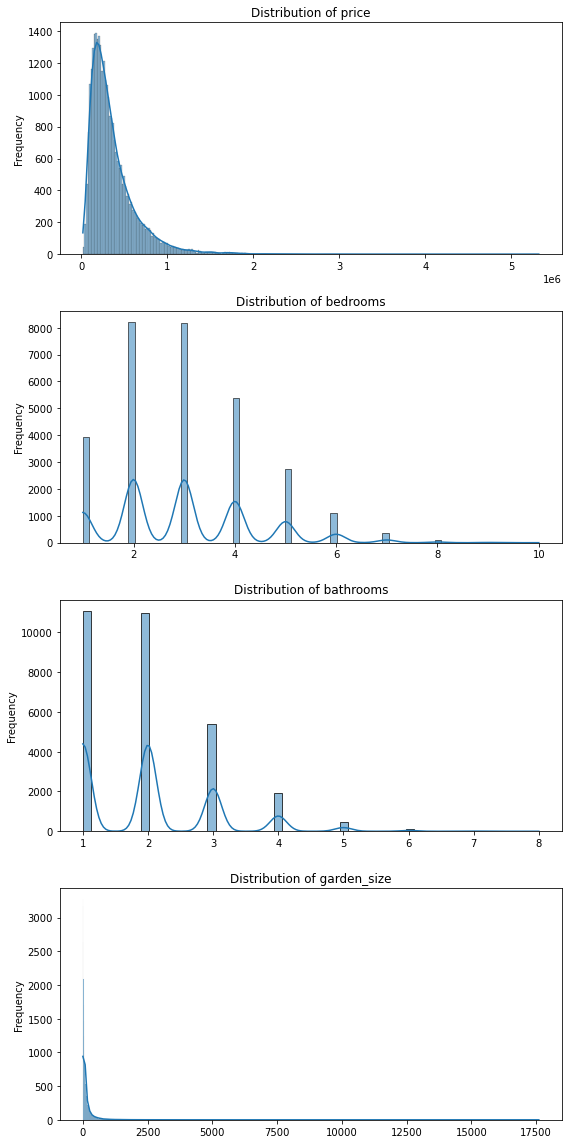

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['price', 'bedrooms', 'bathrooms', 'garden_size']

# Sample a subset of the data, say 10% of it
sample_df = df #sample(frac=0.1)

# Plotting distributions of numerical features on the sample
fig, ax = plt.subplots(len(numerical_features), 1, figsize=(8, 4 * len(numerical_features)))
for i, feature in enumerate(numerical_features):
    sns.histplot(sample_df[feature], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



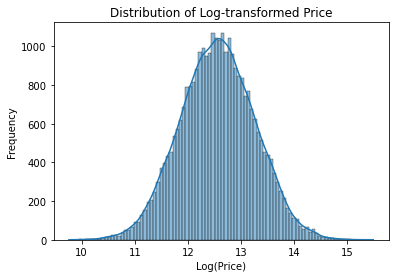

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Log-transform the 'price' column
# Assuming 'df' is your DataFrame that includes the 'price' column.
df_encoded['log_price'] = np.log1p(df['price'])

# Now you can visualize the distribution of the log-transformed price.
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution of Log-transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

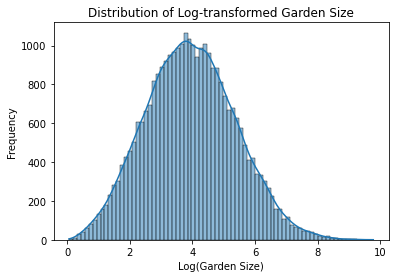

In [19]:
# transform the garden size because of extreme right skewness!
# Visualizing the distribution of the log-transformed garden size
df_encoded['garden_size'] = df_encoded['garden_size'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Now apply the log1p transformation
df_encoded['log_garden_size'] = np.log1p(df_encoded['garden_size'])

# Visualize the distribution of the log-transformed garden size
sns.histplot(df_encoded['log_garden_size'], kde=True)
plt.title('Distribution of Log-transformed Garden Size')
plt.xlabel('Log(Garden Size)')
plt.ylabel('Frequency')
plt.show()
